# Simple Linear Regression Using Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


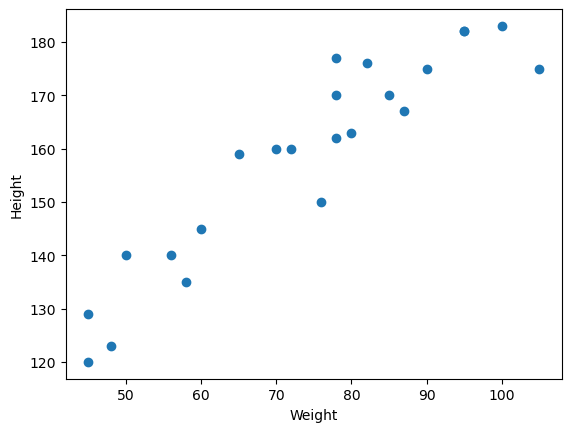

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [8]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [9]:
## divide our dataset into independent and dependent features.
X=df[['Weight']]
y=df['Height']

In [11]:
X.shape,y.shape

((23, 1), (23,))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [16]:
y_train.shape,y_test.shape

((18,), (5,))

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test =scaler.transform(X_test)

In [21]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

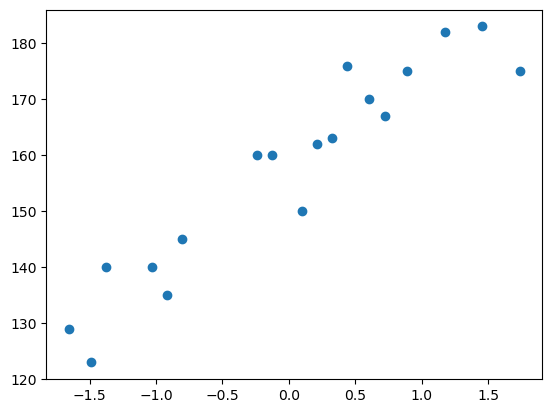

In [22]:
plt.scatter(X_train,y_train)

In [23]:
## Model Training

from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression()

In [25]:
## Training the train Dataset
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
regressor.intercept_ ## this is the theta 0 i.e the y intercept of the line

157.5

In [29]:
regressor.coef_  ## this gives the slope of the best fit line

array([17.03440872])

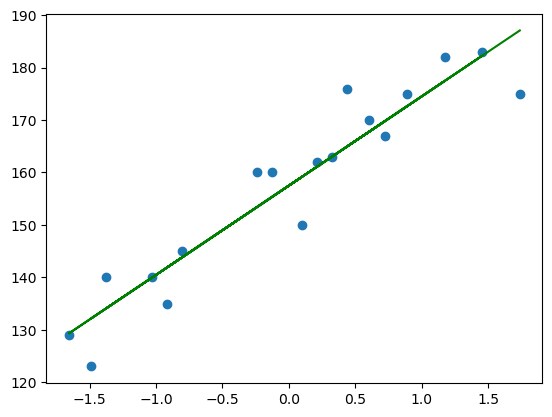

In [33]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'g')

# Prediction of Train Data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

# Prediction of Test Data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [34]:
## Prediction for test data
y_pred_test=regressor.predict(X_test)

In [35]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [36]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Performance Metrics MAE, MSE, RMSE

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

In [40]:
mse

109.77592599051664

In [41]:
mae

9.822657814519232

In [42]:
rmse

10.477400726827081

## Accuracy of Model R Squared and Adjusted R Squared
## Rsquare
Formula

**R^2 = 1 - SSR/SST**

- R^2 = Accuracy of model
- SSR = sum of squares of residual
- SST = total sum of squares

In [43]:
from sklearn.metrics import r2_score

In [44]:
score = r2_score(y_test,y_pred_test)

In [45]:
score

0.776986986042344

## Adjusted r squared
**Adjusted r square**
Adjusted R2 = 1 - [(1-R^2)(n-1)/(n-k-1)]
where :
    - R^2 = The r square of the model
    - n = the number of observations
    - k = the number of predictor variables

In [46]:
# display adjusted R-Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [47]:
scaler

StandardScaler()

In [48]:
regressor

LinearRegression()